# Carbon Emission Prediction using Logistic Regression
### Sustainability & Green Skilling Project

## 1. Import Libraries

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle


## 2. Load Dataset

In [17]:

df = pd.read_csv("carbon_emission_prediction_dataset_large.csv")
df.head()


,Country,Year,Population_Millions,GDP_Billion_USD,Energy_Consumption_TWh,Renewable_Energy_Percentage,CO2_Emissions_Million_Tonnes
0,India,1990,564.94,28522.41,18313.25,40.92,368.45
1,India,1991,91.84,25987.96,15047.82,47.48,296.70
2,India,1992,35.77,29097.90,20819.44,17.74,416.93
3,India,1993,459.84,15752.20,10827.03,22.47,213.92
4,India,1994,919.72,4202.03,7339.01,26.98,171.06


## 3. Data Exploration

In [3]:

print(df.shape)
print(df.columns)
df.info()
df.describe()
df.isnull().sum()


(1020, 7)
Index(['Country', 'Year', 'Population_Millions', 'GDP_Billion_USD',
       'Energy_Consumption_TWh', 'Renewable_Energy_Percentage',
       'CO2_Emissions_Million_Tonnes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1020 non-null   object 
 1   Year                          1020 non-null   int64  
 2   Population_Millions           1020 non-null   float64
 3   GDP_Billion_USD               1020 non-null   float64
 4   Energy_Consumption_TWh        1020 non-null   float64
 5   Renewable_Energy_Percentage   1020 non-null   float64
 6   CO2_Emissions_Million_Tonnes  1020 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 55.9+ KB


Country                         0
Year                            0
Population_Millions             0
GDP_Billion_USD                 0
Energy_Consumption_TWh          0
Renewable_Energy_Percentage     0
CO2_Emissions_Million_Tonnes    0
dtype: int64

## 4. EDA

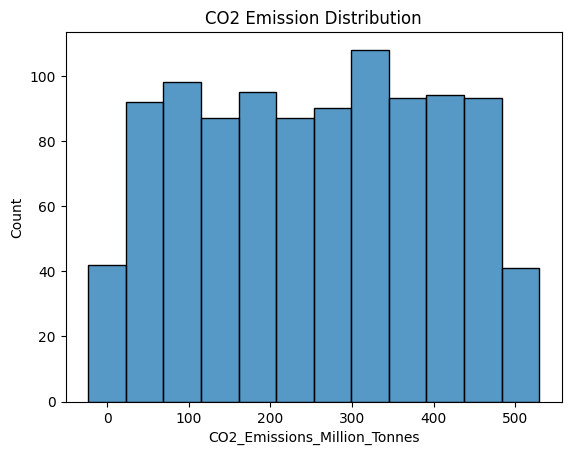

In [4]:

plt.figure()
sns.histplot(df['CO2_Emissions_Million_Tonnes'])
plt.title("CO2 Emission Distribution")
plt.show()


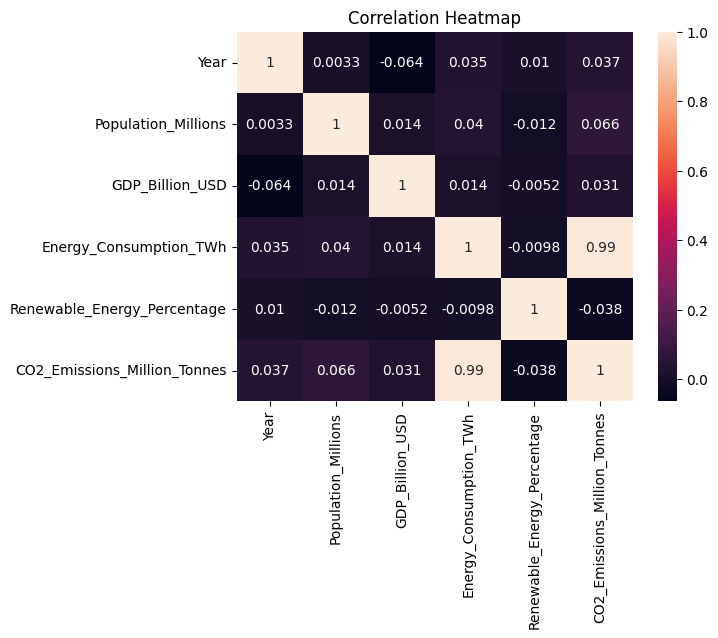

In [5]:

plt.figure()
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Correlation Heatmap")
plt.show()


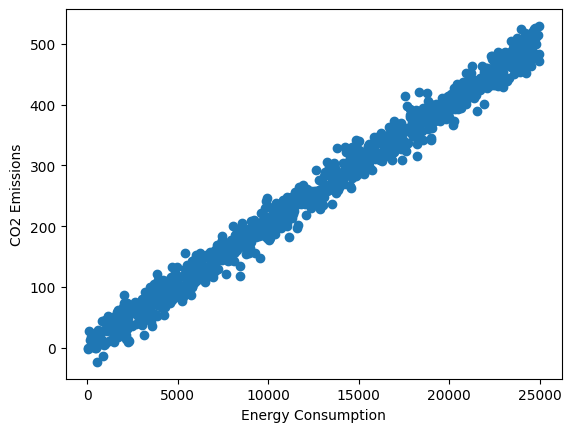

In [6]:

plt.scatter(df['Energy_Consumption_TWh'],
df['CO2_Emissions_Million_Tonnes'])

plt.xlabel("Energy Consumption")
plt.ylabel("CO2 Emissions")
plt.show()


## 5. Data Preprocessing

In [7]:

median_value = df['CO2_Emissions_Million_Tonnes'].median()

df['Emission_Level'] = df['CO2_Emissions_Million_Tonnes'].apply(
lambda x: 1 if x>median_value else 0)


In [8]:

le = LabelEncoder()
df['Country']=le.fit_transform(df['Country'])


In [9]:

X = df[['Country',
'Year',
'Population_Millions',
'GDP_Billion_USD',
'Energy_Consumption_TWh',
'Renewable_Energy_Percentage']]

y = df['Emission_Level']


In [10]:

scaler = StandardScaler()
X=scaler.fit_transform(X)


## 6. Train Test Split

In [11]:

X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size=0.2,random_state=42)


## 7. Model Training

In [12]:

model = LogisticRegression()
model.fit(X_train,y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## 8. Model Evaluation

In [13]:

y_pred = model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.9754901960784313
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.95      1.00      0.98        99

    accuracy                           0.98       204
   macro avg       0.98      0.98      0.98       204
weighted avg       0.98      0.98      0.98       204



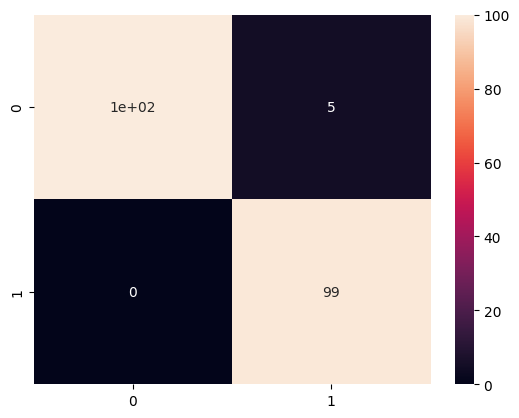

In [14]:

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()


## 9. Save Model

In [22]:
from joblib import dump

dump(model,'model.joblib')
dump(scaler,'scaler.joblib')
dump(le,'encoder.joblib')

print("Files Saved Successfully")

Files Saved Successfully


In [ ]:
from joblib import load
import numpy as np

# Load saved model
model = load('model.joblib')
scaler = load('scaler.joblib')
encoder = load('encoder.joblib')


def ton():

    print("===== Carbon Emission Prediction =====")

    # Take Inputs from User
    country = input("Enter Country Name: ")

    year = int(input("Enter Year: "))

    population = float(input("Enter Population (Millions): "))

    gdp = float(input("Enter GDP (Billion USD): "))

    energy = float(input("Enter Energy Consumption (TWh): "))

    renewable = float(input("Enter Renewable Energy %: "))


    # Encode Country
    country_encoded = encoder.transform([country])[0]


    # Prepare Data
    data = np.array([[
        country_encoded,
        year,
        population,
        gdp,
        energy,
        renewable
    ]])


    # Scale Data
    data = scaler.transform(data)


    # Prediction
    prediction = model.predict(data)[0]


    # Result
    if prediction == 1:
        print("\nPrediction: High Carbon Emission 🔴")
    else:
        print("\nPrediction: Low Carbon Emission 🟢")

In [24]:
ton()

===== Carbon Emission Prediction =====

Prediction: High Carbon Emission 🔴


c:\Users\91705\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
